In [184]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [355]:
record = pd.read_excel("游戏进度.xlsx")
record = record.drop(list(range(13, 30)))
record = record.fillna(value=0)
record = record.astype({'建岛进展': 'int64'})
# record["日期"] = pd.to_datetime(record["日期"])
mark_points = list(record.loc[record["备注"] != 0].index)
record.loc[record["备注"] != 0]

,日期,建岛进展,三段式礼包/台币,钻石/台币,备注
0,2021-11-23,1,0.0,0.0,开始建岛，建岛进度近似每日3~4座岛
4,2021-12-06,46,64.0,128.0,购买三段式礼包64台币、购买钻石128台币，共192台币，折合6.99美元
5,2021-12-07,47,0.0,0.0,没看广告
7,2021-12-09,55,0.0,0.0,用完钻石
11,2021-12-13,60,0.0,1230.0,购买钻石1230台币，折合44.24美元
12,2021-12-14,67,0.0,0.0,成为了VIP？


In [377]:
class PlotGenerator:

    def __init__(self, style="white", rotation=45, palette="dark"):
        self._style = style
        self._rotation = 0
        self._palette = palette
        
    def show_values(self, axs, orient="v", space=.01):
        def _single(ax):
            if orient == "v":
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() / 2
                    _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                    value = '{}'.format(p.get_height())
                    ax.text(_x, _y, value, ha="center", size="x-small") 
            elif orient == "h":
                for p in ax.patches:
                    _x = p.get_x() + p.get_width() + float(space)
                    _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                    value = '{}'.format(p.get_width())
                    ax.text(_x, _y, value, ha="left", size="x-small")

        if isinstance(axs, np.ndarray):
            for idx, ax in np.ndenumerate(axs):
                _single(ax)
        else:
            _single(axs)

    def lineplot(self, x, y, data, mark_points=None, new_fig_name=None, savefig=False):
        plt.figure(figsize=(22, 10))
        sns.set_style(self._style)
        ax = sns.lineplot(data=data, x=x, y=y, marker='o', markersize=10, markerfacecolor='red', markevery=mark_points, palette=self._palette)
        ax.xaxis.set_major_formatter(DateFormatter("%m/%d"))
        plt.xticks(x, rotation=self._rotation, fontsize=15)
        plt.yticks(fontsize=15)
        plt.annotate("start\nbuliding islands", (x[mark_points[0]],y[mark_points[0]]), textcoords="offset points", fontsize=15, xytext=(0,20), ha='center')
        plt.annotate("there is no record from 11/23 to 12/2", (x[mark_points[0]],y[mark_points[0]]), color='red', textcoords="offset points", fontsize=15, xytext=(400,60), ha='center')
        plt.annotate("buy\n a three stage bundle\nand diamonds", (x[mark_points[1]],y[mark_points[1]]), textcoords="offset points", fontsize=15, xytext=(30,-60), ha='center')
        plt.annotate("watch no ads", (x[mark_points[2]],y[mark_points[2]]), textcoords="offset points", fontsize=15, xytext=(0,20), ha='center')
        plt.annotate("no diamonds remain", (x[mark_points[3]],y[mark_points[3]]), textcoords="offset points", fontsize=15, xytext=(0,20), ha='center')
        plt.annotate("buy a lot of diamonds", (x[mark_points[4]],y[mark_points[4]]), textcoords="offset points", fontsize=15, xytext=(0,-30), ha='center')
        plt.annotate("become a VIP", (x[mark_points[5]],y[mark_points[5]]), textcoords="offset points", fontsize=15, xytext=(0,20), ha='center')
        plt.xlabel("date", fontsize=20)
        plt.ylabel("island no.", fontsize=20)
        plt.ylim([0, 80])
        plt.title("Island King Gaming Record", fontsize=25)
        if savefig:
            plt.savefig(new_fig_name)

In [378]:
plot_ins = PlotGenerator()

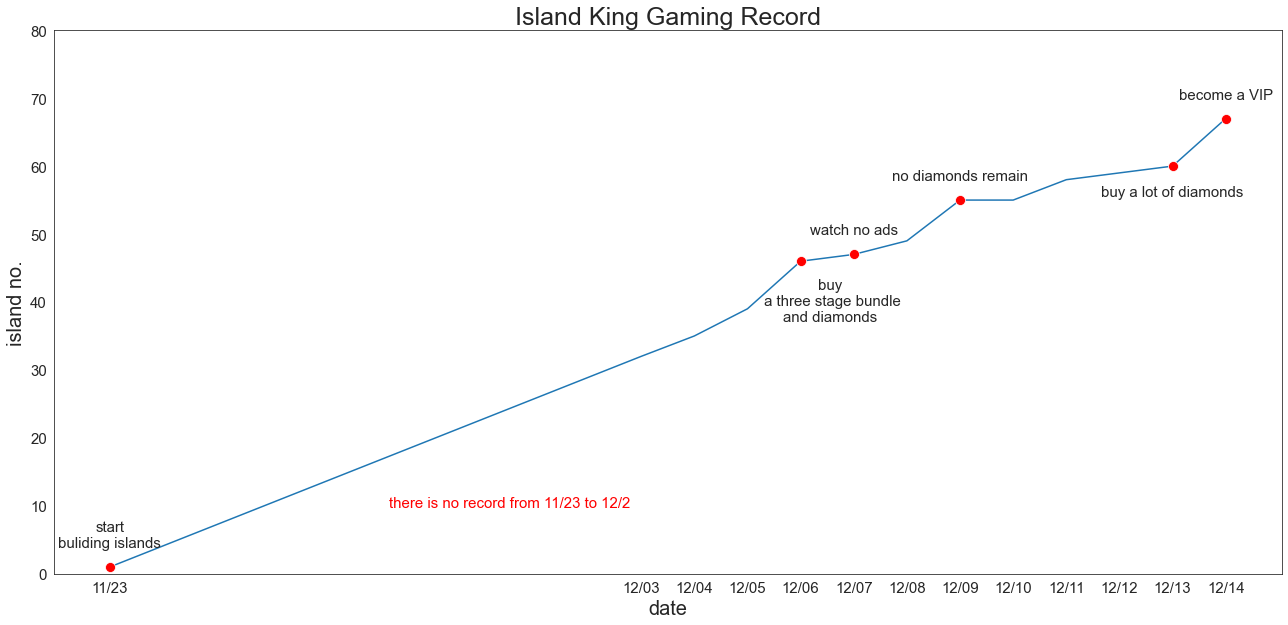

In [379]:
plot_ins.lineplot(x=record["日期"], y=record["建岛进展"], data=record, mark_points=mark_points)
plt.show()